In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

base_dir = os.getcwd()
# Chemins des sous-dossiers pour train et test
file_path = os.path.join(base_dir,os.pardir,'data', 'processed', 'train2.csv')

df = pd.read_csv(file_path)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sélection des features (variables explicatives) et de la target (variable cible)
# Sélection des features et de la target
features = [
    "age", "height_cm", "weight_kg", "pace", "shooting",
    "passing", "dribbling", "defending", "physic", "weak_foot", "skill_moves"
    
]
target = "overall"

X = df[features]
y = df[target]

# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### training

In [3]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor

#regressor = LinearRegression().fit(X_train, y_train)
randomForest=RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)


### Model evaluation

In [4]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = randomForest.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_absolute_error(y_test, y_pred)):.2f}")


Mean squared error: 1.47
Coefficient of determination: 0.97
RMSE: 0.96


### Plot

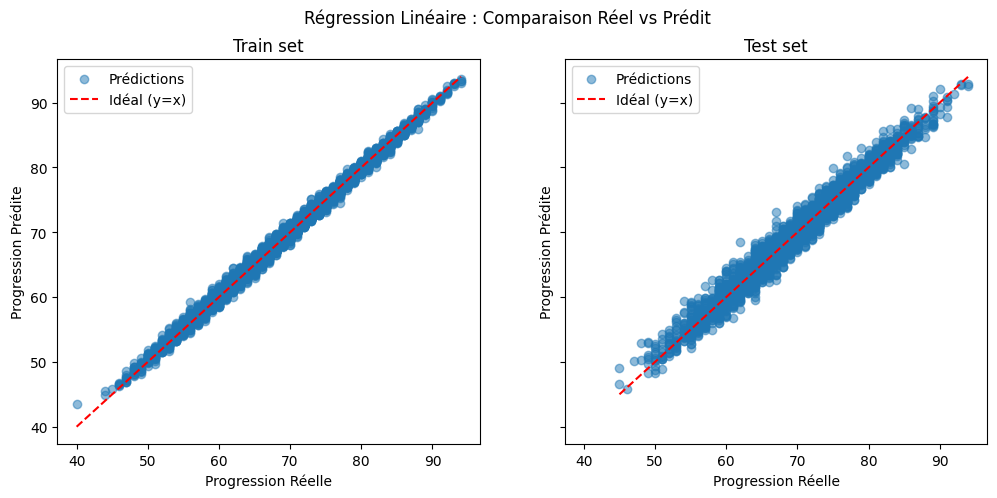

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Trier les valeurs pour une meilleure visualisation
sorted_indices = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_indices]
y_pred_sorted = np.array(y_pred)[sorted_indices]

# Création de la figure avec deux sous-graphiques (train/test)
fig, ax = plt.subplots(ncols=2, figsize=(12, 5), sharex=True, sharey=True)

# Graphique de gauche : données d'entraînement
ax[0].scatter(y_train, randomForest.predict(X_train), alpha=0.5, label="Prédictions")
ax[0].plot(
    [min(y_train), max(y_train)], 
    [min(y_train), max(y_train)], 
    color="red", linestyle="--", 
    label="Idéal (y=x)"
)
ax[0].set(xlabel="Progression Réelle", ylabel="Progression Prédite", title="Train set")
ax[0].legend()

# Graphique de droite : données de test
ax[1].scatter(y_test, y_pred, alpha=0.5, label="Prédictions")
ax[1].plot(
    [min(y_test), max(y_test)], 
    [min(y_test), max(y_test)], 
    color="red", linestyle="--", 
    label="Idéal (y=x)"
)
ax[1].set(xlabel="Progression Réelle", ylabel="Progression Prédite", title="Test set")
ax[1].legend()

# Titre global
fig.suptitle("Régression Linéaire : Comparaison Réel vs Prédit")

plt.show()


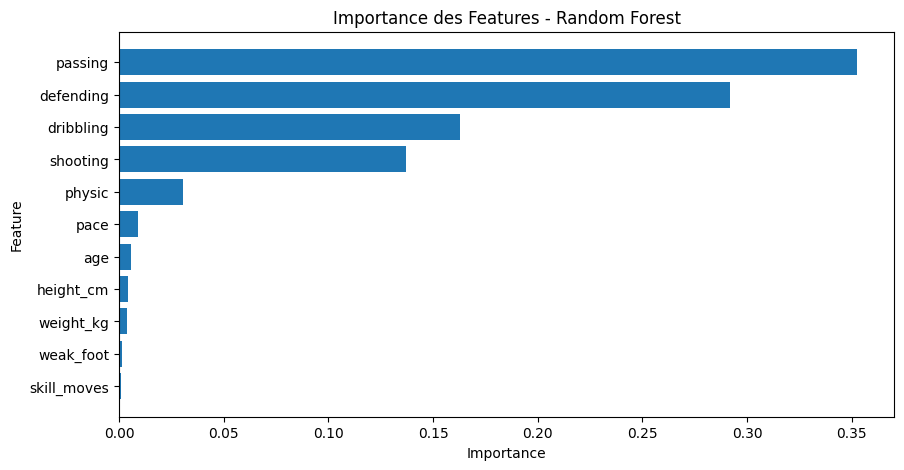

In [6]:
import matplotlib.pyplot as plt

# Récupérer l'importance des features pour Random Forest
feature_importance = randomForest.feature_importances_
feature_df = pd.DataFrame({"Feature": features, "Importance": feature_importance})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# Tracer l'importance des features
plt.figure(figsize=(10, 5))
plt.barh(feature_df["Feature"], feature_df["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Importance des Features - Random Forest")
plt.gca().invert_yaxis()
plt.show()


In [7]:
import pickle

# Sauvegarde du modèle entraîné
with open("random_Forest.pkl", "wb") as f:
    pickle.dump(randomForest, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)